## Árvore de Decisão e Florestas Aleatórias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
caminho = '/Users/user/Documents/Pessoal/Refactored_Py_DS_ML_Bootcamp-master/15-Decision-Trees-and-Random-Forests/kyphosis.csv'
df = pd.read_csv(caminho)

In [4]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [6]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


### Exploração dos dados

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


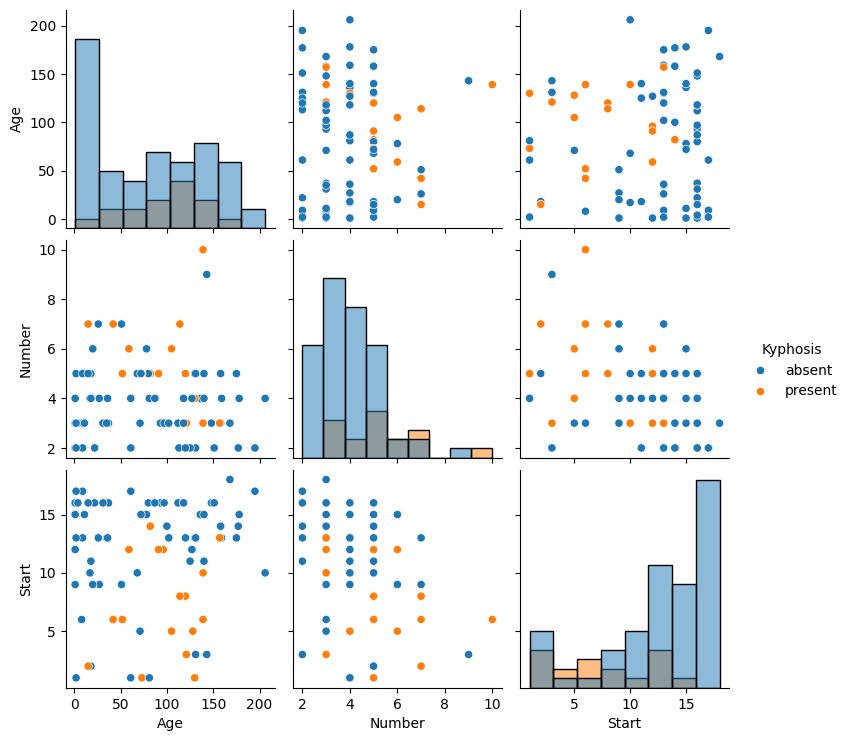

In [12]:
sns.pairplot(df, hue='Kyphosis', diag_kind='hist')

### Modelagem - Árvore de decisão

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df.drop('Kyphosis', axis=1)
y = df['Kyphosis']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dtree = DecisionTreeClassifier()

In [18]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
pred = dtree.predict(X_test)

In [20]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [21]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[16  3]
 [ 4  2]]
              precision    recall  f1-score   support

      absent       0.80      0.84      0.82        19
     present       0.40      0.33      0.36         6

    accuracy                           0.72        25
   macro avg       0.60      0.59      0.59        25
weighted avg       0.70      0.72      0.71        25



### Modelagem - Floresta Aleatória

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rfc = RandomForestClassifier(n_estimators=200)

In [24]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [25]:
rfc_pred = rfc.predict(X_test)

In [26]:
print(confusion_matrix(y_test, rfc_pred))
print(classification_report(y_test, rfc_pred))

[[19  0]
 [ 5  1]]
              precision    recall  f1-score   support

      absent       0.79      1.00      0.88        19
     present       1.00      0.17      0.29         6

    accuracy                           0.80        25
   macro avg       0.90      0.58      0.58        25
weighted avg       0.84      0.80      0.74        25



In [30]:
df['Kyphosis'].value_counts() # Dados desbalanceados 

Kyphosis
absent     64
present    17
Name: count, dtype: int64

In [31]:
from sklearn.tree import plot_tree

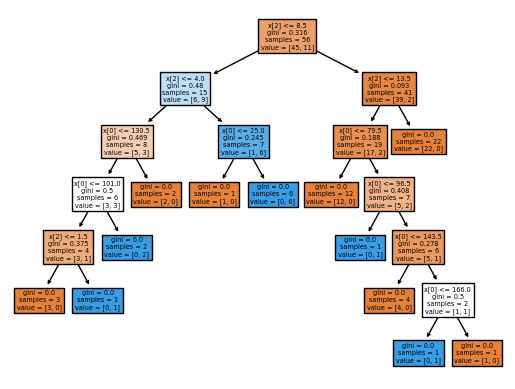

In [33]:
plot_tree(dtree, filled=True)
plt.show()